In [35]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
import astropy.constants as const
import bisect

from interpolate_bulla_sed import BullaSEDInterpolator
from interpolate_bulla_sed import uniq_cos_theta, uniq_mej_dyn, uniq_mej_wind, uniq_phi, phases, lmbd
from sed_to_lc import SEDDerviedLC

[ 0.25  0.75  1.25  1.75  2.25  2.75  3.25  3.75  4.25  4.75  5.25  5.75
  6.25  6.75  7.25  7.75  8.25  8.75  9.25  9.75 10.25 10.75 11.25 11.75
 12.25 12.75 13.25 13.75 14.25 14.75 15.25 15.75 16.25 16.75 17.25 17.75
 18.25 18.75 19.25 19.75 20.25 20.75 21.25 21.75 22.25 22.75 23.25 23.75
 24.25 24.75 25.25 25.75 26.25 26.75 27.25 27.75 28.25 28.75 29.25 29.75
 30.25 30.75 31.25 31.75 32.25 32.75 33.25 33.75 34.25 34.75 35.25 35.75
 36.25 36.75 37.25 37.75 38.25 38.75 39.25 39.75 40.25 40.75 41.25 41.75
 42.25 42.75 43.25 43.75 44.25 44.75 45.25 45.75 46.25 46.75 47.25 47.75
 48.25 48.75 49.25 49.75 50.25 50.75 51.25 51.75 52.25 52.75 53.25 53.75
 54.25 54.75 55.25 55.75 56.25 56.75 57.25 57.75 58.25 58.75 59.25 59.75
 60.25 60.75 61.25 61.75 62.25 62.75 63.25 63.75 64.25 64.75 65.25 65.75
 66.25 66.75 67.25 67.75 68.25 68.75 69.25 69.75 70.25 70.75 71.25 71.75
 72.25 72.75 73.25 73.75 74.25 74.75 75.25 75.75 76.25 76.75 77.25 77.75
 78.25 78.75 79.25 79.75 80.25 80.75 81.25 81.75 82

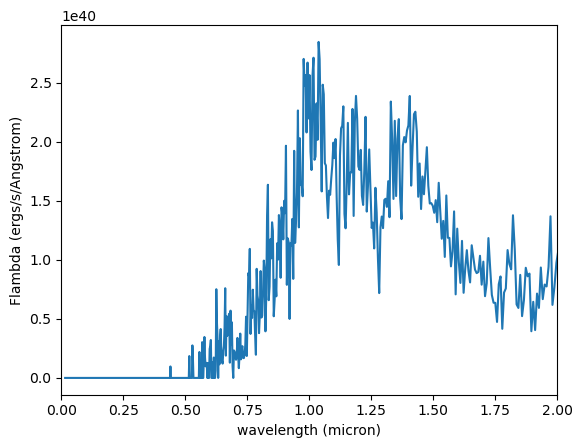

In [16]:
# taken/modified from readmodel.py 

# open model file
name = '../KNmodel/spectrum.h5'
fin    = h5py.File(name,'r')

# frequency in Hz
nu    = np.array(fin['nu'],dtype='d')*u.Hz
# array of time in seconds
times = np.array(fin['time'])
# covert time to days
times = times*u.s.to(u.day)
print(times)

# specific luminosity (ergs/s/Hz)
# this is a 2D array, Lnu[times][nu]
Lnu_all   = np.array(fin['Lnu'],dtype='d')*u.erg/u.s/u.Hz

# for example, get the spectrum at day 2.0
t = 1.0
# index corresponding to t
it = bisect.bisect(times,t)
# spectrum at this epoch
Lnu = Lnu_all[it,:]

# if you want thing in Flambda (ergs/s/Angstrom)
c    = const.c.cgs
lam  = (c/nu).to(u.micron).value
Llam = (Lnu*nu**2.0/c).to(u.erg/u.s/u.micron).value

#plot it up
plt.plot(lam,Llam)
plt.xlabel('wavelength (micron)')
plt.xlim(0,2)
plt.ylabel('Flambda (ergs/s/Angstrom)')
plt.ion()
plt.show()
#j = raw_input('press any key to exit>')


In [5]:
import afterglowpy as grb

In [15]:
cos_theta = np.random.uniform(0,1,1)
mej_dyn = np.random.uniform(uniq_mej_dyn[0],uniq_mej_dyn[-1],1)
mej_wind = np.random.uniform(uniq_mej_wind[0],uniq_mej_wind[-1],1)
phi = np.random.uniform(uniq_phi[0],uniq_phi[-1],1)
dist = 

0.01501420275496765

In [6]:
?grb

Type:        module
String form: <module 'afterglowpy' from '/Users/haille/anaconda3/envs/KNevn/lib/python3.11/site-packages/afterglowpy/__init__.py'>
File:        ~/anaconda3/envs/KNevn/lib/python3.11/site-packages/afterglowpy/__init__.py
Docstring:  
afterglowpy

Top-level module for *afterglowpy*, computes light curves and spectra of
Gamma-ray burst (GRB) afterglows.

This module provides the primary user-facing functions provided by afterglowpy,
useful physical constants, and conversion factors. Internal computations are
performed in the submodules.

Functions
---------

These are the primary interface into *afterglowpy*. If you just want to compute
light curves, spectra, and intensity maps, and are unconcerned with the
underlying algorithm, these are all you need.

=================== =========================================================
:func:`fluxDensity` Compute the flux density F_nu of a GRB afterglow.
:func:`intensity`   Compute the specific intensity I_nu of a GRB afterg

In [13]:
from sed_to_lc import SEDDerviedLC, lsst_bands
from interpolate_bulla_sed import phases
from astropy import units as u
from astropy.coordinates import Distance, SkyCoord
import matplotlib.pyplot as plt



In [17]:

mej_wind = 0.07
mej_dyn = 0.0025
phi = 23
cos_theta = 0.73

# coordinates for GW170817
c = SkyCoord(ra = "13h09m48.08s", dec = "−23deg22min53.3sec")
d = 43*u.Mpc

av = 0.0

# LC from sed
GW170817 = SEDDerviedLC(mej_dyn=mej_dyn, mej_wind = mej_wind, phi = phi, cos_theta = cos_theta, dist=d, coord=c, av = av)
lcs = GW170817.getAbsMagsInPassbands(lsst_bands, apply_extinction=False, apply_redshift=False)
lcs['lssti']
#GW170817.makeSedPlot()
#plt.show()


array([-12.48612821, -14.22804302, -15.31003516, -15.51038533,
       -15.32775198, -15.59327346, -15.84054608, -15.99599767,
       -15.98945139, -15.98156325, -15.84028179, -15.68389174,
       -15.52768682, -15.40976367, -15.26796203, -15.12428088,
       -14.99841759, -14.81964317, -14.66744039, -14.63564957,
       -14.4955153 , -14.35878969, -14.27410139, -14.16607071,
       -14.07264259, -13.95358152, -13.87765433, -13.73461684,
       -13.63604495, -13.55746094, -13.46338542, -13.35452293,
       -13.26334946, -13.21493695, -13.0799405 , -13.03243276,
       -12.92393469, -12.75672242, -12.73522326, -12.5791327 ,
       -12.5097025 , -12.42399999, -12.32085278, -12.25805393,
       -12.15375961, -12.08493293, -11.95719758, -11.88037255,
       -11.79186098, -11.67293771, -11.63766734, -11.55626015,
       -11.39586923, -11.37375354, -11.29941095, -11.22151544,
       -11.13032567, -11.04712516, -10.99648333, -10.92006778,
       -10.78823318, -10.783263  , -10.68426463, -10.60

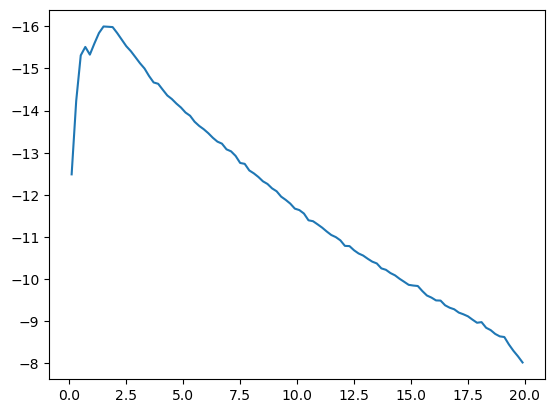

In [18]:
plt.plot(phases, lcs['lssti'], label = 'lssti')
plt.gca().invert_yaxis()
plt.show()

In [19]:
import pandas as pd

pd.DataFrame(lcs).to_csv('interp_lc.csv')

In [24]:
pd.DataFrame(GW170817.sed).to_csv('interp_sed.csv')
df = pd.DataFrame(GW170817.sed)
GW170817.sed.shape

(100, 500)

In [25]:
GW170817.sed.shape # time x flux density (can I get afterglow to give me this shape)

(100, 500)

In [334]:
import afterglowpy as grb
#from tqdm import tqdm

params_grb = {# all from Troja 2020 except for d_L and theta_obs
  'jetType':     grb.jet.TopHat,     # Top-Hat jet
  'specType':    0,                  # Basic Synchrotron Spectrum

  'thetaObs':    np.arccos(cos_theta),   # need theta_view, bulla was in cos(theta_view)
  'E0':          7.9e52, # Isotropic-equivalent energy in erg, 1e52.9
  'thetaCore':   0.07,   # Half-opening angle in radians
  'thetaWing':   0.47,   # Wing angle in radians
  'n0':          0.002,    # circumburst density in cm^{-3}
  'p':           2.17,    # electron energy distribution index
  'epsilon_e':   0.04,    # epsilon_e
  'epsilon_B':   0.0001,   # epsilon_B
  'xi_N':        1.0,    # Fraction of electrons accelerated
  'd_L':         d.to(u.cm).value, # Luminosity distance in cm
}

# params_grb = {'jetType':     grb.jet.TopHat,     # Top-Hat jet
#      'specType':    0,                  # Basic Synchrotron Spectrum

#      'thetaObs':    0.05,   # Viewing angle in radians
#      'E0':          1.0e53, # Isotropic-equivalent energy in erg
#      'thetaCore':   0.1,    # Half-opening angle in radians
#      'n0':          1.0,    # circumburst density in cm^{-3}
#      'p':           2.2,    # electron energy distribution index
#      'epsilon_e':   0.1,    # epsilon_e
#      'epsilon_B':   0.01,   # epsilon_B
#      'xi_N':        1.0,    # Fraction of electrons accelerated
#      'd_L':         1.3e26, # Luminosity distance in cm
#      'z':           0.55} 

nsf_grb = { # from Troja 2020 
  'inclination_EM': 0,
  'log10_E0': 52.9,
  'thetaCore': 0.07,
  'thetaWing': 0.47,
  'log10_n0':-2.7,
  'p':2.17,
  'log10_epsilon_e':-1.4, 
  'log10_epsilon_B':-4.,
  'luminosity_distance': 40,}

nsf_kn = { 
  'log10_mej_dyn': -2.27,
  'log10_mej_wind': -1.28,
  'KNphi': 49.5,
  'inclination_EM': 0, 
  'luminosity_distance': 40}

grb_params = { # use the same params I used for nsf fig
     'jetType':     grb.jet.TopHat,     # Top-Hat jet
     'specType':    0,                  # Basic Synchrotron Spectrum
     'thetaObs':    nsf_grb['inclination_EM'],   # Viewing angle in radians
     'E0':          10**nsf_grb['log10_E0'], # Isotropic-equivalent energy in erg
     'thetaCore':   nsf_grb['thetaCore'],    # Half-opening angle in radians
     'thetaWing':   nsf_grb['thetaWing'],    # Wing angle in radians
     'n0':          10**nsf_grb['log10_n0'],    # circumburst density in cm^{-3}
     'p':           nsf_grb['p'],    # electron energy distribution index
     'epsilon_e':   10**nsf_grb['log10_epsilon_e'],    # epsilon_e
     'epsilon_B':   10**nsf_grb['log10_epsilon_B'],   # epsilon_B
     'xi_N':        1.0,    # Fraction of electrons accelerated
     'd_L':         10*u.pc.to(u.cm), # Luminosity distance in cm
     }

kn_params = {
    'mej_dyn': 10**nsf_kn['log10_mej_dyn'],
    'mej_wind': 10**nsf_kn['log10_mej_wind'],
    'phi': nsf_kn['KNphi'],
    'cos_theta':  np.cos(nsf_kn['inclination_EM']) 
}


t_s = phases*u.d.to(u.s)
nu = (const.c / (lmbd*u.AA)).to(u.Hz)


In [335]:
Flmbda = []
Fnus = []
for n in nu:
    Fnu = (grb.fluxDensity(t_s, n, **grb_params)*u.mJy).to(u.erg/u.s/u.cm**2/u.Hz) # gives the flux density in mJy
    Fnus.append(Fnu.value)

    Fl = (Fnu*(n**2)/const.c).to(u.erg/u.s/u.cm**2/u.AA)
    Flmbda.append(Fl.value)

Flmbd_grb = np.array(Flmbda).transpose()
Fnus_grb = np.array(Fnus).transpose()
# Fnus = pd.DataFrame(
#     ([grb.fluxDensity(t_s, n, **params_grb) for n in nu]*u.erg/u.s/u.Hz).to(u.erg/u.s/u.AA)
    
#     ).transpose()

# now convert to correct units


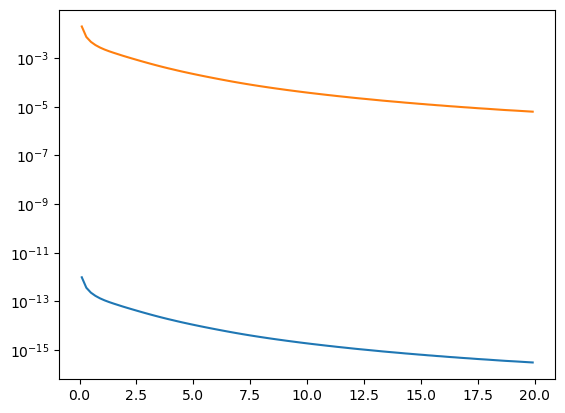

In [345]:
plt.plot(phases, Fnus_grb[:, 60])
plt.plot(phases, Flmbd_grb[:, 60])
plt.yscale('log') 
plt.show()

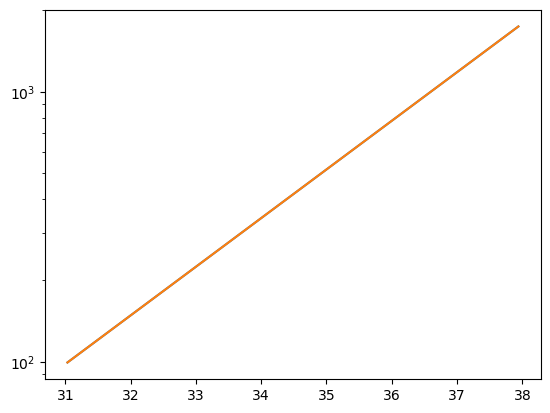

In [346]:
# i think this is a good sign
plt.plot(np.log(nu.value), nu*Fnus_grb[0])
plt.plot(np.log(nu.value), ((const.c / nu).to(u.AA)) * Flmbd_grb[0])
plt.yscale('log') 
plt.show()

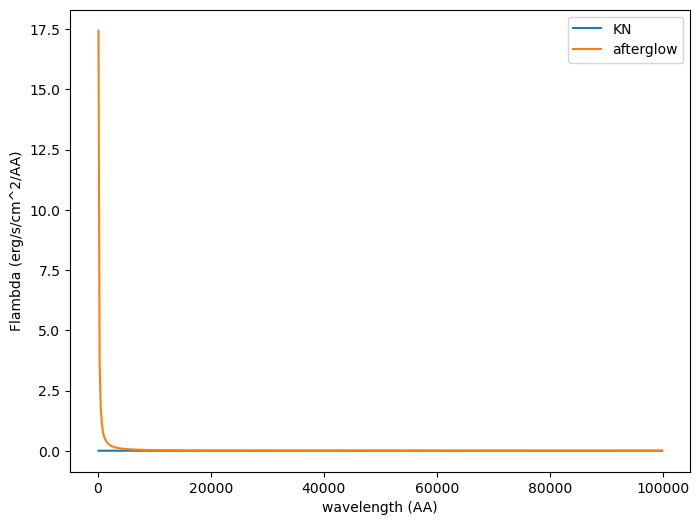

In [347]:
plt.figure(figsize=(8,6))
plt.plot(lmbd, GW170817.sed[0], label = "KN")
plt.plot(lmbd, Flmbd_grb[0], label = "afterglow")
plt.xlabel("wavelength (AA)")
plt.ylabel("Flambda (erg/s/cm^2/AA)")
plt.legend()
plt.show()

In [274]:
GW170817.sed.shape, Flmbd_grb.shape

((100, 500), (100, 500))

In [275]:
import sncosmo

# from ved, adapted to use the SED I just created
def getAbsMagsInPassbands(sed, passbands, lc_phases = phases, apply_extinction = False, apply_redshift = False):

        lcs = {}
        
        for passband in passbands:
            source_name = f"test_{passband}"

            interpolated_sed = sed

            source = sncosmo.TimeSeriesSource(phase=phases, wave=lmbd, flux = interpolated_sed, name=source_name, zero_before=True)

            model = sncosmo.Model(source)

            if apply_extinction:

                # add host galaxy extinction E(B-V)
                model.add_effect(sncosmo.CCM89Dust(), 'host', 'rest')
                model.set(hostebv = self.host_ebv)

                # add MW extinction to observing frame
                model.add_effect(sncosmo.F99Dust(), 'mw', 'obs')
                model.set(mwebv=self.mw_ebv)

            if apply_redshift:

                # Adding redshift based on distance: https://docs.astropy.org/en/stable/api/astropy.coordinates.Distance.html#astropy.coordinates.Distance.z
                z = self.distance.z
                model.set(z=z)

            abs_mags = model.bandmag(band=passband, time = lc_phases, magsys="ab")
            lcs[passband] = abs_mags

        return lcs



In [314]:
KN = SEDDerviedLC(kn_params['mej_dyn'], kn_params['mej_wind'], kn_params['phi'], kn_params['cos_theta'], dist=40*u.Mpc, coord=c, av=av)

In [309]:
KN_mag = getAbsMagsInPassbands(GW170817.sed, lsst_bands)
grb_mag = getAbsMagsInPassbands(Flmbd_grb, lsst_bands)

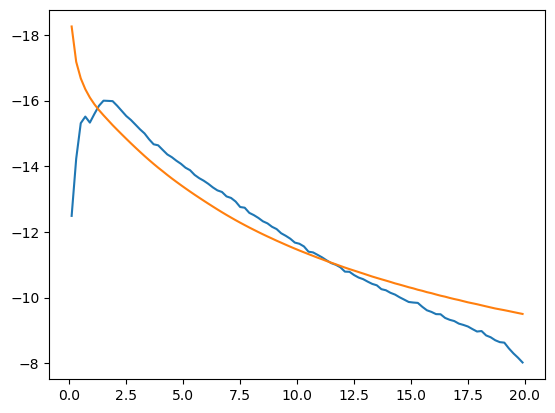

In [316]:
plt.plot(phases, KN_mag['lssti'])
plt.plot(phases, grb_mag['lssti'])
plt.gca().invert_yaxis()

In [319]:
from astropy.coordinates import SkyCoord, Distance

Distance(40*u.Mpc) == 40*u.Mpc

True

In [351]:
from afterglow_addition import AfterglowAddition


In [352]:

# GW170817 object
mej_dyn = 10**-2.27
mej_wind = 10**-1.28
phi = 49.5*u.deg.to(u.rad)
cos_theta = 0.73

c = SkyCoord(ra = "13h09m48.08s", dec = "−23deg22min53.3sec")
d = 40*u.Mpc
KN = SEDDerviedLC(mej_dyn, mej_wind,phi, cos_theta, dist=d, coord=c, av=0.0)

# afterglow
E0 = 10**52.9 #erg
n0 = 10**-3.0 #cm**-3
afterglow = AfterglowAddition(KN, E0, n0)

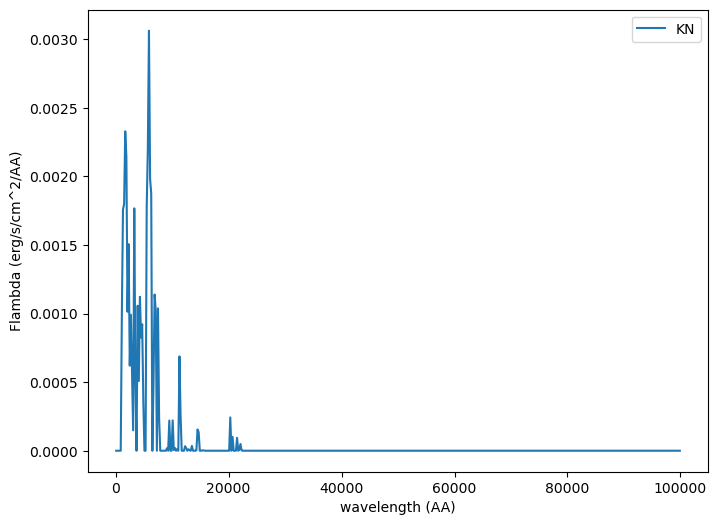

In [354]:

# plot the SED
plt.figure(figsize=(8,6))
plt.plot(lmbd, KN.sed[0], label = "KN")
plt.plot(lmbd, afterglow.sed[0], label = "afterglow")
plt.xlabel("wavelength (AA)")
plt.ylabel("Flambda (erg/s/cm^2/AA)")
plt.legend()
plt.show()